# Regressão Linear com Scikit Learn

### Bibliotecas que iremos utilizar

In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# bibliotecas para modelagem de dados

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from category_encoders import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# graficos de residuos

from yellowbrick.regressor import ResidualsPlot
from yellowbrick.regressor import PredictionError

## 1- Importação dos Dados

In [41]:
dados = pd.read_csv("C:/Users/mcaio/Desktop/regressao linear/Car details v3.csv")

In [ ]:
dados.head(3)

## 2 - Arrumando dados

In [42]:
# criando uma coluna com a idade dos automóveis
dados['age'] = 2021-dados['year'] 


# retirando todas as letras da coluna mileage
dados['engine'] = dados['engine'].str.replace('\D', '')

# retirando todas as letras da coluna max_power
dados['max_power'] = dados['max_power'].str.replace('\D', '')

# testando novo

dados['mileage'] = dados['mileage'].str.replace('\D', '')

dados['mileage'] = pd.to_numeric(dados['mileage'])

# removendo colunas do nosso banco de dados
dados.drop(['name', 'torque', 'year'], inplace = True, axis = 1)

# convertendo para numérico
dados['max_power'] = pd.to_numeric(dados['max_power'])

# convertendo para numérico
dados['engine'] = pd.to_numeric(dados['engine'])


In [43]:
dados.query("owner != 'Test Drive Car'", inplace = True)

## Modelagem dos Dados

In [44]:
dados['selling_price'] = np.log(dados['selling_price'])
dados['km_driven'] = np.log(dados['km_driven'])

In [45]:
features = dados.drop('selling_price', axis = 1).copy()
resposta = dados['selling_price']

In [46]:
x_train, x_test, y_train, y_test = train_test_split(features, resposta, test_size = 0.2, random_state= 2)

In [47]:
print(x_train['engine'].mean())
print(x_train['max_power'].mean())
print(x_train['seats'].mean())
print(x_train['mileage'].mean())

1457.46986236355
2794.610496364211
5.414491377946527
947.047460844803


In [48]:
for i in[x_train]:
    i['engine'].fillna(i['engine'].mean(), inplace = True)
    i['max_power'].fillna(i['max_power'].mean(), inplace = True)
    i['seats'].fillna(i['seats'].mean(), inplace = True)
    i['mileage'].fillna(i['mileage'].mean(), inplace = True)

C:\Users\mcaio\anaconda3\lib\site-packages\pandas\core\series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [49]:
for i in[x_test]:
    i['engine'].fillna(1457.46986236355, inplace = True)
    i['max_power'].fillna(2794.610496364211, inplace = True)
    i['seats'].fillna(5.414491377946527, inplace = True)
    i['mileage'].fillna(947.047460844803, inplace = True)

In [50]:
col_categorico = [coluna for coluna in x_train.columns if x_train[coluna].dtype.name == 'object']
col_numerico = [coluna for coluna in x_train.columns if x_train[coluna].dtype.name != 'object']

In [51]:
numeric_transformer = Pipeline(
    steps = [('scaler', StandardScaler())]
)

categorical_transformer = OneHotEncoder(handle_unknown="ignore")

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, col_numerico),
        ("cat", categorical_transformer, col_categorico),
    ]
)

pipe = Pipeline(
    steps=[("preprocessor", preprocessor), ("lin_reg", LinearRegression())]
)


In [52]:

from sklearn import set_config
set_config(display='diagram')


pipe.fit(x_train, y_train)

C:\Users\mcaio\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['km_driven', 'mileage',
                                                   'engine', 'max_power',
                                                   'seats', 'age']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['fuel', 'seller_type',
                                                   'transmission',
                                                   'owner'])])),
                ('algoritmo', LinearRegression())])

In [53]:
some_data = x_train.iloc[:5]
some_label = y_train.iloc[:5]

print("Predictions:", pipe.predict(some_data))
print("Verdadeiro:", list(some_label))

Predictions: [13.18056454 11.95164647 13.83522122 13.01744042 12.48902858]
Verdadeiro: [11.918390573078392, 12.254862809699606, 13.710150042306449, 12.765688433465597, 12.765688433465597]


In [54]:
predicoes = pipe.predict(x_train)

mse = mean_squared_error(y_train, predicoes)
rmse = np.sqrt(mse)
print("RMSE:", rmse)

rquadrado = r2_score(y_train, predicoes)
print("R-Quadrado:", rquadrado)

RMSE: 0.35940728623676516
R-Quadrado: 0.8152750764133913


## Validação Cruzada

In [55]:
scores = cross_validate(pipe, x_train, y_train, scoring = ['r2','neg_root_mean_squared_error'], cv = 5)

C:\Users\mcaio\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\Users\mcaio\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\Users\mcaio\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\Users\mcaio\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\Users\mcaio\anaconda3\lib\site-packages\category_encoders

In [56]:
contador = 0
contador2 = 0
for i in scores['test_r2']:
    contador = contador + 1
    print("Fold {} - R2:    {:.4f}" .format(contador, i))

for j in scores['test_neg_root_mean_squared_error']:
    contador2 = contador2 + 1
    print("Fold {} - RMSE: {}" .format(contador2, -j))
    
    
print("Média R2:    {}".format(scores['test_r2'].mean()))
print("Média RMSE: {}".format(-scores['test_neg_root_mean_squared_error'].mean()))

Fold 1 - R2:    0.8113
Fold 2 - R2:    0.8026
Fold 3 - R2:    0.8254
Fold 4 - R2:    0.8143
Fold 5 - R2:    0.8171
Fold 1 - RMSE: 0.35750781460759984
Fold 2 - RMSE: 0.3803729357373113
Fold 3 - RMSE: 0.34352939839222923
Fold 4 - RMSE: 0.3678129830749501
Fold 5 - RMSE: 0.35288264572331096
Média R2:    0.8141453979008713
Média RMSE: 0.3604211555070803


### Vamos a base de teste

In [57]:
final_predictions = pipe.predict(x_test)

In [58]:
mse_test = mean_squared_error(y_test, final_predictions)
r_quadrado_test = r2_score(y_test, final_predictions)

In [60]:
print("Mean Squared Error Test: {} ".format(np.sqrt(mse_test)))
print("R2 Test: {}".format(r_quadrado_test))

Mean Squared Error Test: 0.3651280183534945 
R2 Test: 0.8122081780980023


## Avaliando os pressupostos do modelo

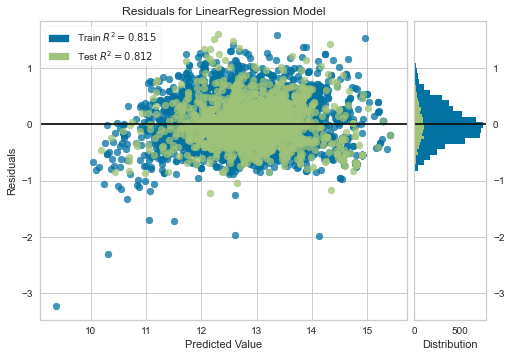

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [61]:
visual_erro = ResidualsPlot(pipe, hist = True)

visual_erro.fit(x_train, y_train)
visual_erro.score(x_test, y_test)
visual_erro.show()

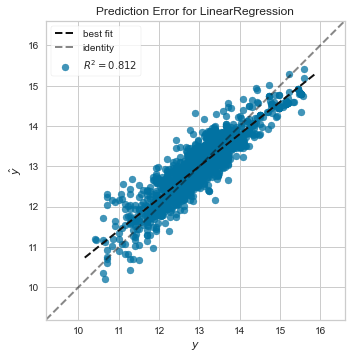

<AxesSubplot:title={'center':'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [62]:
graph = PredictionError(pipe)

graph.fit(x_train, y_train)
graph.score(x_test, y_test)
graph.show()